<div align="center"><span style="font-family:arialblack;font-size:48px;color:red"> KAGGLE BANK TRANSACTIONS </span></div><hr>
Bank Transaction Dataset for Fraud Detection

Detailed Analysis of Transactional Behavior and Anomaly Detection

In [99]:
# libs & dir
import numpy as np

import os
for dirname, _, filenames in os.walk('C:\Data Analyst\Etude de cas\Bank_Transactions'):
    for filename in filenames:
        filePath = os.path.join(dirname, filename)


In [100]:
# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [101]:
# libs data, calc & graph
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Read csv file
df = pd.read_csv(filePath)
print(df.shape)
df.head()

(2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [103]:
# Check Columns names
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [104]:
# Infos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [124]:
# Describe
num_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "AccountBalance"]
cat_features = ["TransactionID", "AccountID", "DeviceID", "MerchantID", "TransactionType", "Channel", "Location", "IP Address", "CustomerOccupation", "LoginAttempts"]

print("Data describe numerical features:")
cmap = sns.light_palette("orange", as_cmap=True)
display(df[num_features].describe().T.style.background_gradient(cmap=cmap))

Data describe numerical features:


,count,mean,std,min,25%,50%,75%,max
TransactionAmount,2512.000000,297.593778,291.946243,0.260000,81.885000,211.140000,414.527500,1919.110000
CustomerAge,2512.000000,44.673965,17.792198,18.000000,27.000000,45.000000,59.000000,80.000000
TransactionDuration,2512.000000,119.643312,69.963757,10.000000,63.000000,112.500000,161.000000,300.000000
AccountBalance,2512.000000,5114.302966,3900.942499,101.250000,1504.370000,4735.510000,7678.820000,14977.990000


In [105]:
# Missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent
})
missing_df

,Missing Values,Percentage
TransactionID,0,0.0
AccountID,0,0.0
TransactionAmount,0,0.0
TransactionDate,0,0.0
TransactionType,0,0.0
Location,0,0.0
DeviceID,0,0.0
IP Address,0,0.0
MerchantID,0,0.0
Channel,0,0.0


In [106]:
# Is there some duplicated record ?
df.duplicated().sum()

np.int64(0)

In [107]:
# Fill missing numeric values with median
for col in df.select_dtypes(include=['float64','int64']):
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [108]:
# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0,126,14.09,684,1,36,365,186,14,0,70,0,81,1,5112.21,105
1,1,450,376.24,1192,1,15,50,82,51,0,68,0,141,1,13758.91,192
2,2,18,126.29,1276,1,23,229,343,8,2,19,3,56,1,1122.35,41
3,3,68,184.50,823,1,33,182,300,1,2,26,3,25,1,8569.06,163
4,4,406,13.45,1959,0,1,298,501,90,2,26,3,198,1,7429.40,16


In [121]:
# drop columns
df_2 = df.copy()
drop_cols = [
    "TransactionID", "AccountID", "TransactionDate",
    "PreviousTransactionDate", "IP Address", "Amount_Z_Score"
]
df_2.drop(columns=[c for c in drop_cols if c in df_2.columns], inplace=True)
numeric_cols = df_2.select_dtypes(include=[np.number]).columns.tolist()

categorical_cols = df_2.select_dtypes(include=['object']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['TransactionAmount', 'TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'isFraud']
Categorical columns: []


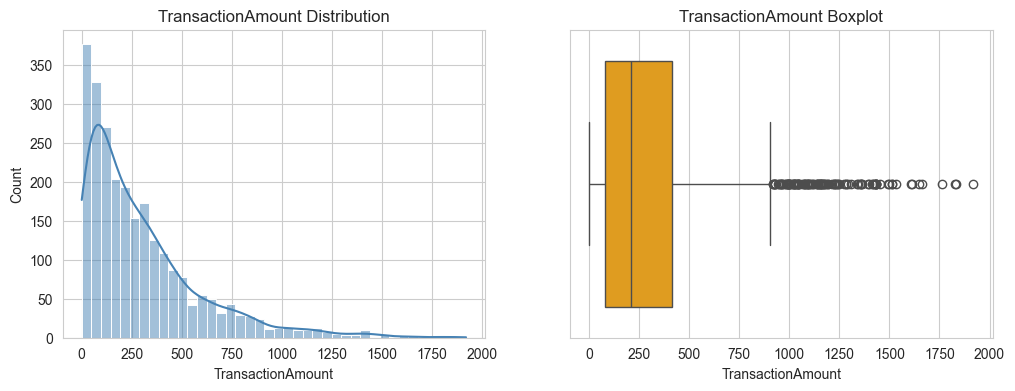

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64
Skewness: 1.74, Kurtosis: 3.64



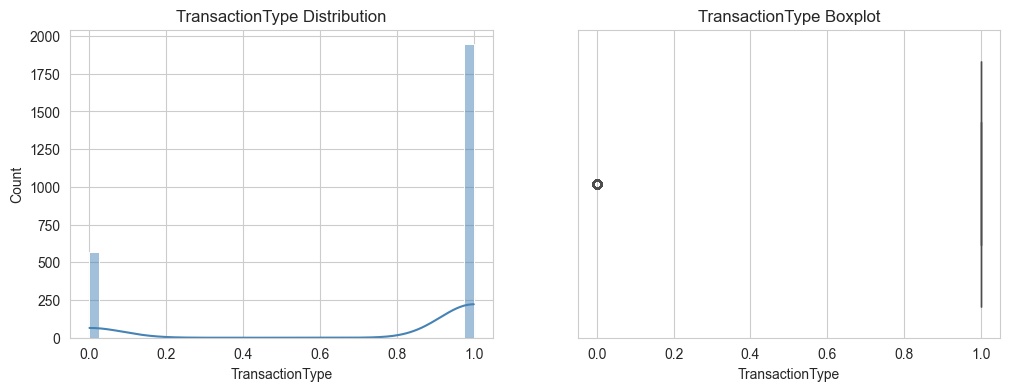

count    2512.000000
mean        0.773885
std         0.418398
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: TransactionType, dtype: float64
Skewness: -1.31, Kurtosis: -0.28



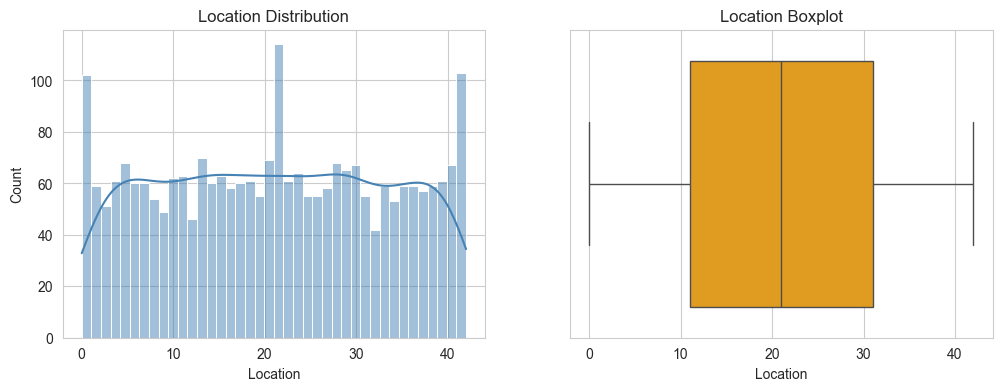

count    2512.000000
mean       21.032643
std        12.253549
min         0.000000
25%        11.000000
50%        21.000000
75%        31.000000
max        42.000000
Name: Location, dtype: float64
Skewness: 0.01, Kurtosis: -1.18



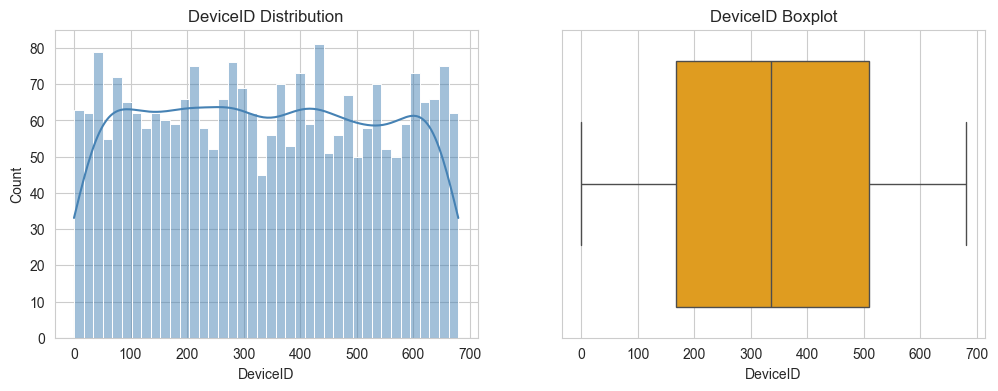

count    2512.000000
mean      337.732882
std       198.210671
min         0.000000
25%       166.750000
50%       335.500000
75%       510.000000
max       680.000000
Name: DeviceID, dtype: float64
Skewness: 0.02, Kurtosis: -1.21



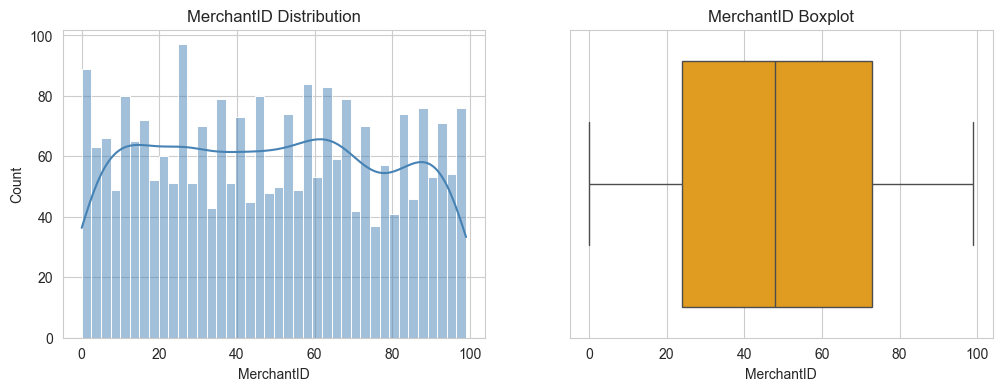

count    2512.000000
mean       48.523885
std        29.032470
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: MerchantID, dtype: float64
Skewness: 0.04, Kurtosis: -1.18



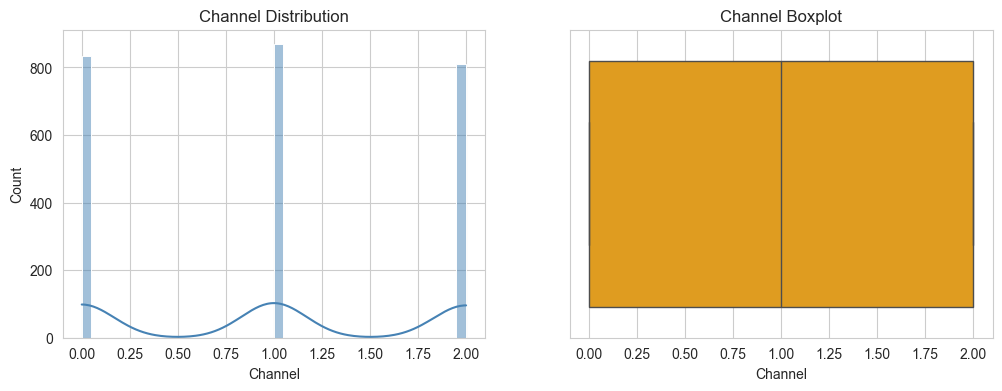

count    2512.000000
mean        0.991242
std         0.809100
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Channel, dtype: float64
Skewness: 0.02, Kurtosis: -1.47



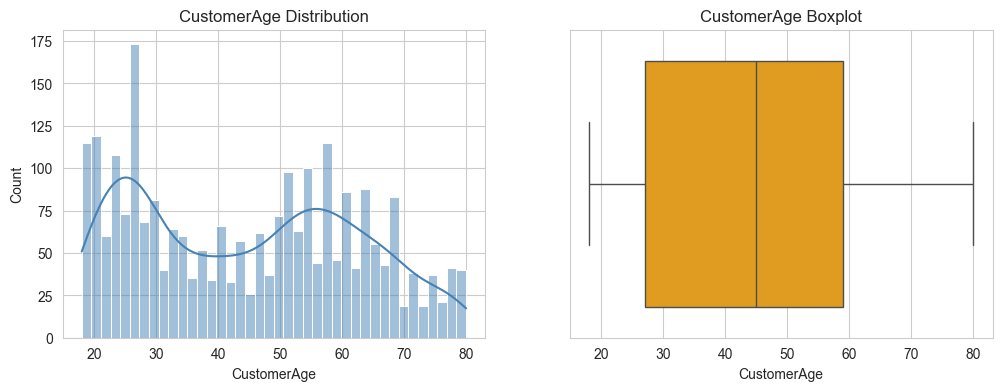

count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64
Skewness: 0.15, Kurtosis: -1.22



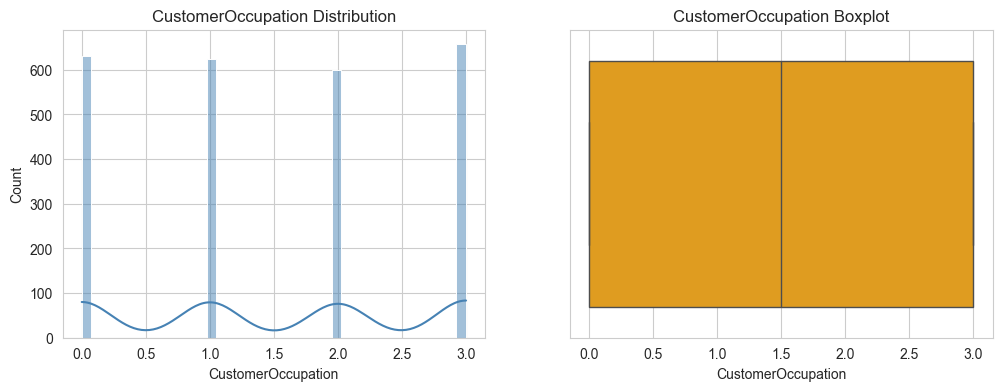

count    2512.000000
mean        1.510350
std         1.129548
min         0.000000
25%         0.000000
50%         1.500000
75%         3.000000
max         3.000000
Name: CustomerOccupation, dtype: float64
Skewness: -0.00, Kurtosis: -1.39



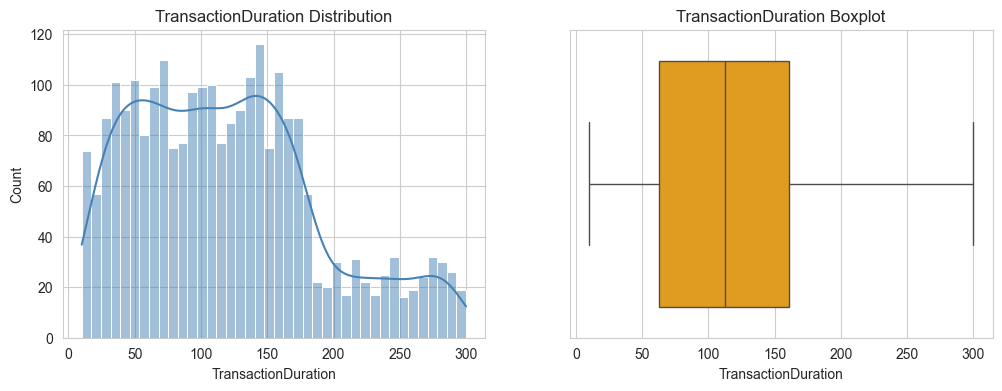

count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64
Skewness: 0.60, Kurtosis: -0.26



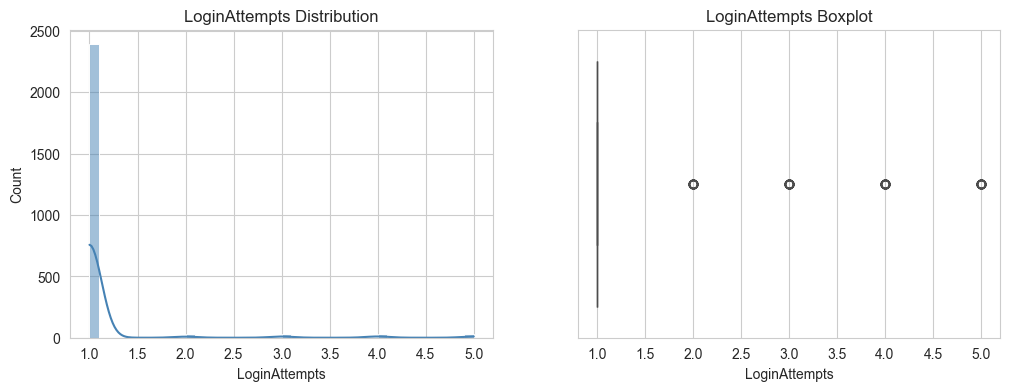

count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64
Skewness: 5.17, Kurtosis: 26.67



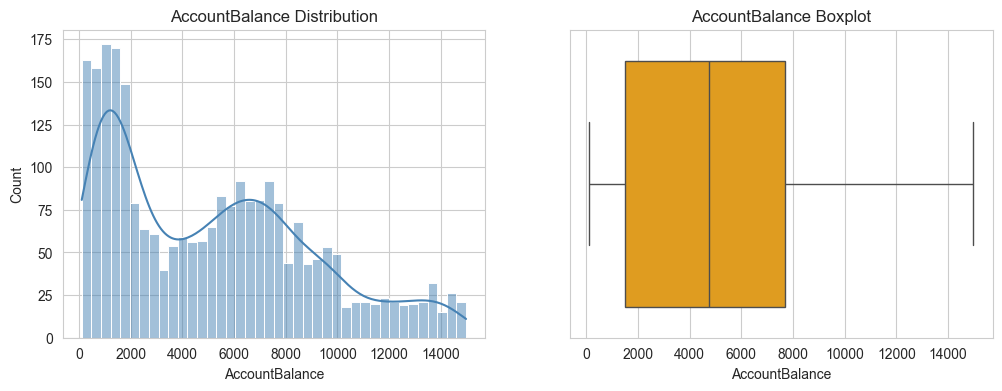

count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64
Skewness: 0.60, Kurtosis: -0.56



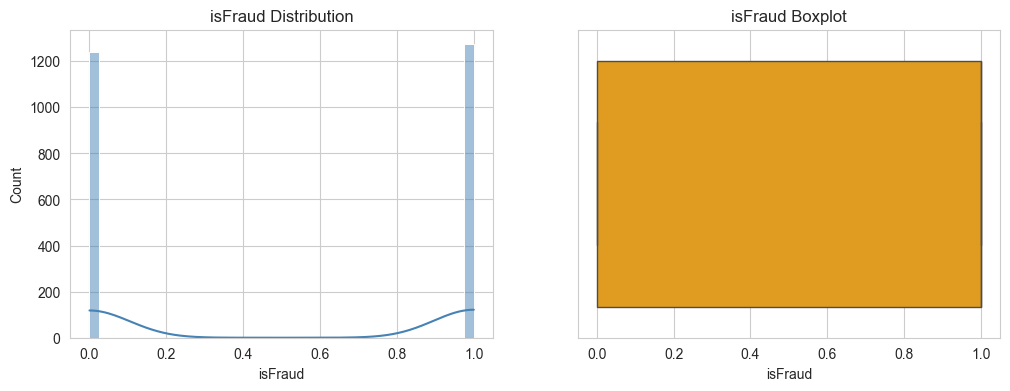

count    2512.000000
mean        0.506768
std         0.500054
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: isFraud, dtype: float64
Skewness: -0.03, Kurtosis: -2.00



In [122]:
# graphical distribution
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], kde=True, bins=40, ax=axes[0], color="steelblue")
    axes[0].set_title(f"{col} Distribution")
    sns.boxplot(x=df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"{col} Boxplot")
    plt.show()
    print(df[col].describe().T)
    print(f"Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}\n")

In [110]:
# If dataset doesn't have 'isFraud', create dummy target for demonstration:
if 'isFraud' not in df.columns:
    print('isFraud col added !')
    import numpy as np
    df['isFraud'] = np.random.choice([0,1], size=len(df))  # 0=Not Fraud, 1=Fraud

# Features and Target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

isFraud col added !


In [111]:
# Train model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

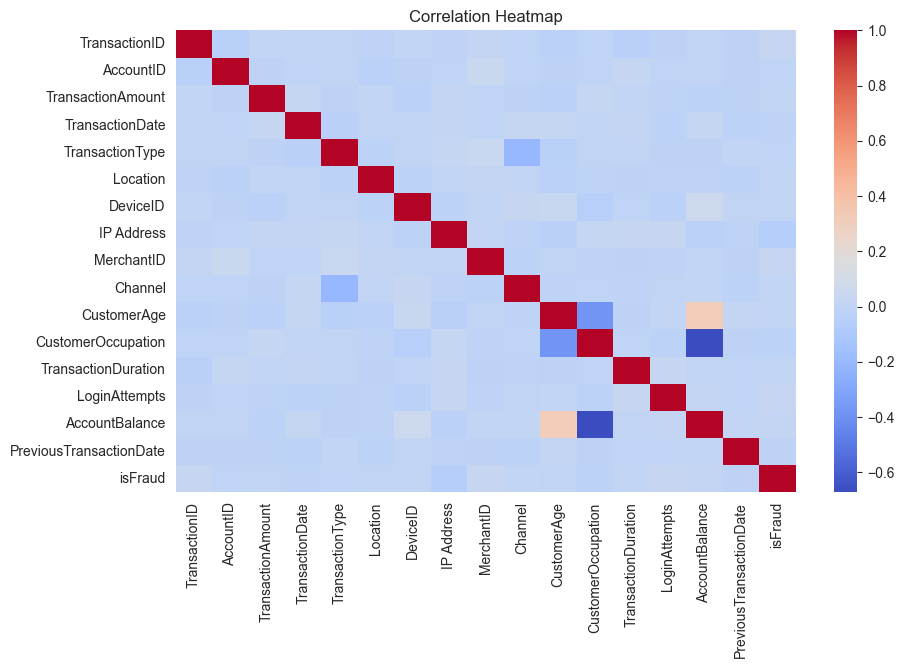

In [113]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

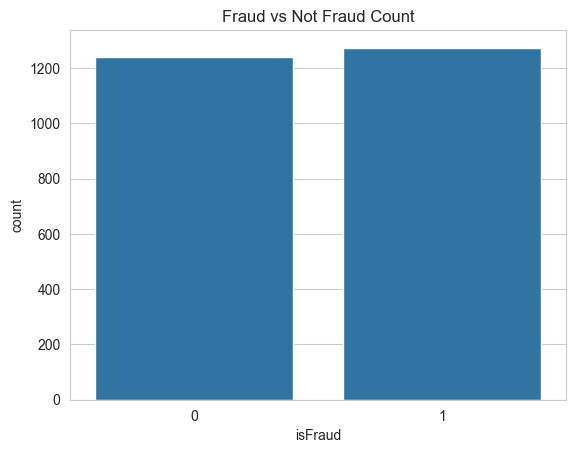

In [114]:
# Fraud Count Plot
sns.countplot(x=y)
plt.title("Fraud vs Not Fraud Count")
plt.show()

In [115]:
# Initialize 3 models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

best_model = None
best_score = 0

# Train and compare models
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc}")
    if acc > best_score:
        best_score = acc
        best_model = model

print("\n✅ Best Model:", best_model.__class__.__name__, "with Accuracy:", best_score)

RandomForest Accuracy: 0.49105367793240556
XGBoost Accuracy: 0.4870775347912525
LogisticRegression Accuracy: 0.48111332007952284

✅ Best Model: RandomForestClassifier with Accuracy: 0.49105367793240556


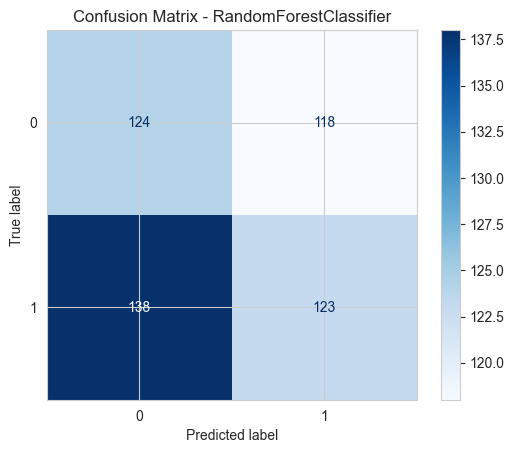

In [116]:
# compare real & predicted values
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - {best_model.__class__.__name__}")
plt.show()